# bureau balance and bureau data cleaning

## Import libaries

In [2]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import modules.missing as ms
import warnings
warnings.filterwarnings('ignore')

## Bureau Balance

In [3]:
bb = pd.read_csv('.././data/bureau_balance.csv')

### Preliminary analysis

In [4]:
display(bb.sample(8))
print(f'Bureau Balance data contains:\n{bb.shape[0]} rows and {bb.shape[1]} columns')
print(f'\n\Bureau Balance data information:\n')
print(bb.info())
print(f'\nStatistical Summary of numerical columns:\n')

numerical = bb.select_dtypes(include='number')
display(numerical.describe())

categorical = bb.select_dtypes(include='object')
display(categorical.describe())

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
23317911,6483677,-48,X
27024711,5987457,-42,0
867061,6361002,-1,0
7914605,6524324,-22,0
21708727,6241880,-23,C
23057632,5994468,-44,C
16624414,5454076,-86,0
3919750,6579373,-12,0


Bureau Balance data contains:
27299925 rows and 3 columns

\Bureau Balance data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None

Statistical Summary of numerical columns:



,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


,STATUS
count,27299925
unique,8
top,C
freq,13646993


### Credit card balance Missing and Duplicate values checking 

In [5]:
print(f'\nMissing values:{bb.isna().sum().sum()}')
print(f'\nDuplicated values:{bb.duplicated().sum()}')


Missing values:0

Duplicated values:0


no missing and duplicate values

## Bureau

In [6]:
bureau = pd.read_csv('.././data/bureau.csv')

### Preliminary analysis

In [7]:
display(bureau.sample(8))
print(f'Bureau data contains:\n{bureau.shape[0]} rows and {bureau.shape[1]} columns')
print(f'\nBureau data information:\n')
print(bureau.info())
print(f'\nStatistical Summary of numerical columns:\n')

numerical = bureau.select_dtypes(include='number')
display(numerical.describe())

categorical = bureau.select_dtypes(include='object')
display(categorical.describe())

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
342647,424258,5732809,Closed,currency 1,-230,0,-48.0,-48.0,0.0,0,50985.0,0.0,0.0,0.0,Consumer credit,-48,NaN
639233,165253,6230136,Closed,currency 1,-238,0,-115.0,-115.0,0.0,0,105840.0,0.0,0.0,0.0,Consumer credit,-115,NaN
1169191,215686,6201479,Closed,currency 1,-1559,0,-827.0,-812.0,NaN,0,55372.5,0.0,0.0,0.0,Consumer credit,-778,NaN
126915,164424,5245210,Closed,currency 1,-1897,0,-795.0,-1553.0,0.0,0,54000.0,0.0,0.0,0.0,Credit card,-1553,NaN
1570044,207095,5753434,Closed,currency 1,-628,0,-567.0,-567.0,0.0,0,47101.5,0.0,0.0,0.0,Consumer credit,-563,NaN
825108,198621,6351535,Active,currency 1,-1164,0,663.0,NaN,NaN,0,2836399.5,1839064.5,NaN,0.0,Car loan,-26,40500.0
741985,224413,5166481,Closed,currency 1,-1132,0,9826.0,-117.0,0.0,0,445500.0,0.0,0.0,0.0,Credit card,-113,NaN
1332456,250672,6598450,Closed,currency 1,-2263,0,-1898.0,-1745.0,NaN,0,225000.0,0.0,0.0,0.0,Consumer credit,-254,NaN


Bureau data contains:
1716428 rows and 17 columns

Bureau data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None

Statistical Summary of numerical colu

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


### Duplicate values checking

In [15]:
dup = bureau.duplicated().sum()
print(f'Duplicated values: {dup}')

Duplicated values: 0


### Missing vales Checking and Handling

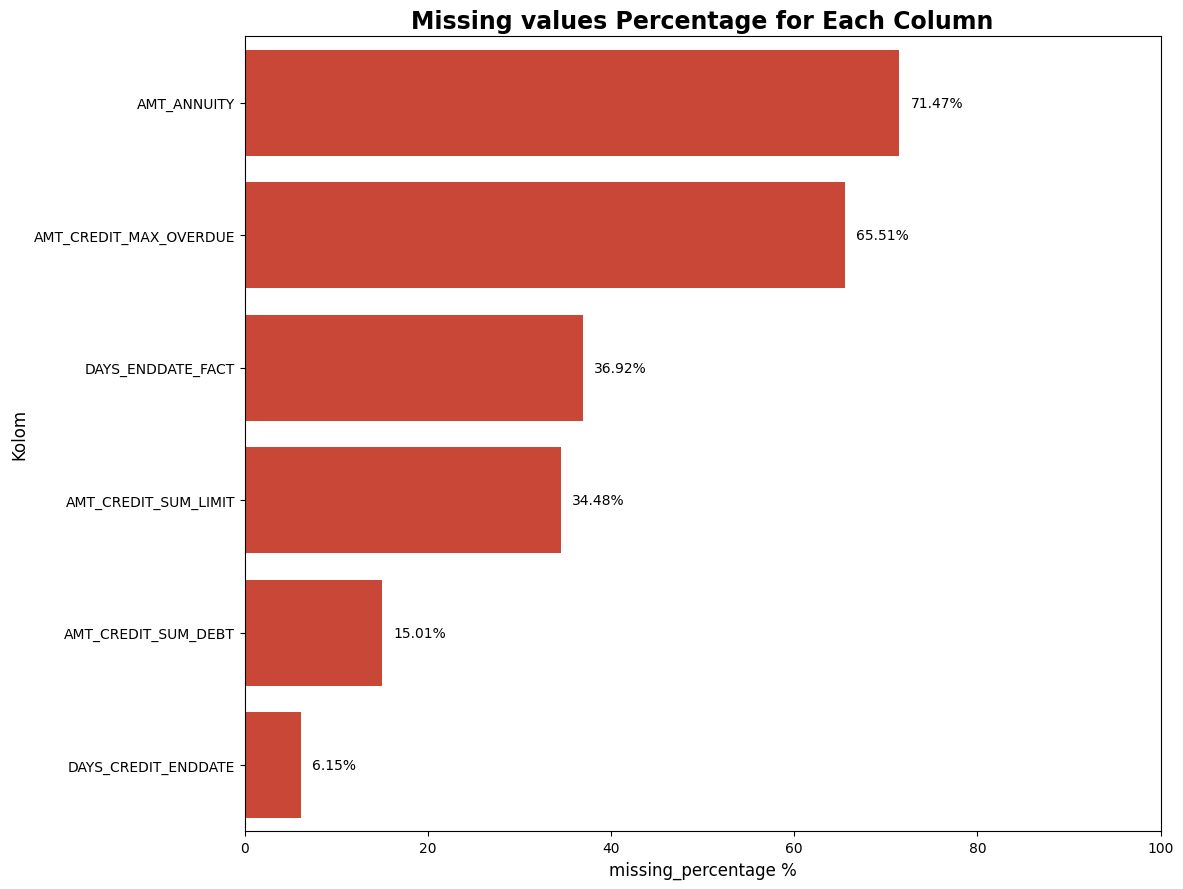

In [16]:
ms.plot_missing_percentage(bureau)

In [17]:
# drop columns with too much missing values percentage
bureaucl = ms.dropnan(bureau, 0.2)

In [20]:
bureaucl.loc[bureaucl.AMT_CREDIT_SUM_DEBT.isna()]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
2,215354,5714464,Active,currency 1,-203,0,528.0,0,464323.5,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,0,90000.0,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,0,2700000.0,NaN,0.0,Consumer credit,-21
12,162297,5714474,Active,currency 1,-277,0,5261.0,0,7033500.0,NaN,0.0,Mortgage,-31
15,238881,5714484,Closed,currency 1,-2911,0,-2607.0,0,48555.0,NaN,0.0,Consumer credit,-2601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716391,129669,5057475,Closed,currency 1,-918,0,-736.0,0,90000.0,NaN,0.0,Consumer credit,-708
1716396,181001,5057529,Closed,currency 1,-339,0,NaN,0,1057500.0,NaN,0.0,Consumer credit,-163
1716407,146896,5057629,Closed,currency 1,-1990,0,-1244.0,0,90000.0,NaN,0.0,Consumer credit,-1248
1716415,317217,5057684,Closed,currency 1,-1970,0,-1577.0,0,93955.5,NaN,0.0,Consumer credit,-1577


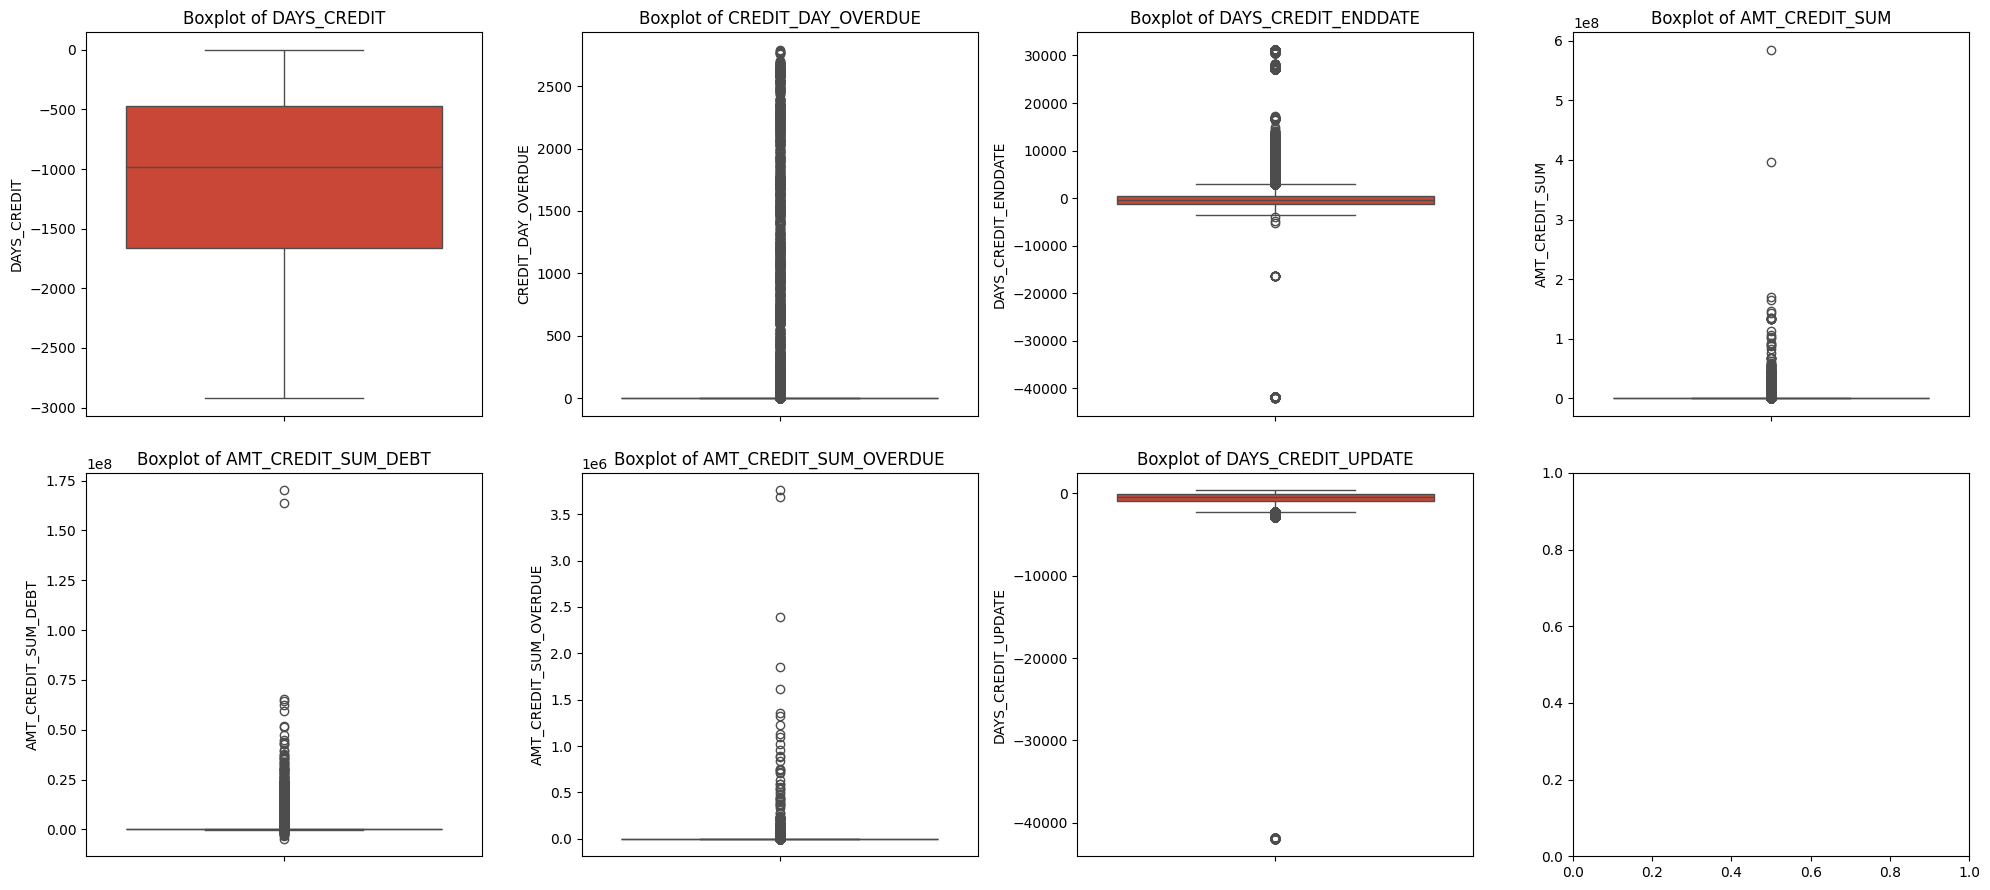

In [18]:
numbur = bureaucl.select_dtypes(include='number').drop(['SK_ID_CURR', 'SK_ID_BUREAU', 'CNT_CREDIT_PROLONG'], axis=1)

# Create boxplot for every numerical column
fig, ax = plt.subplots(2, 4, figsize=(20, 9))
ax = ax.flatten()
for i, col in enumerate(numbur.columns):
    sns.boxplot(y=numbur[col], ax=ax[i], color='#E1341E')
    ax[i].set_title(f'Boxplot of {col}')
plt.tight_layout()

some of features from bureau dataset contains outliers

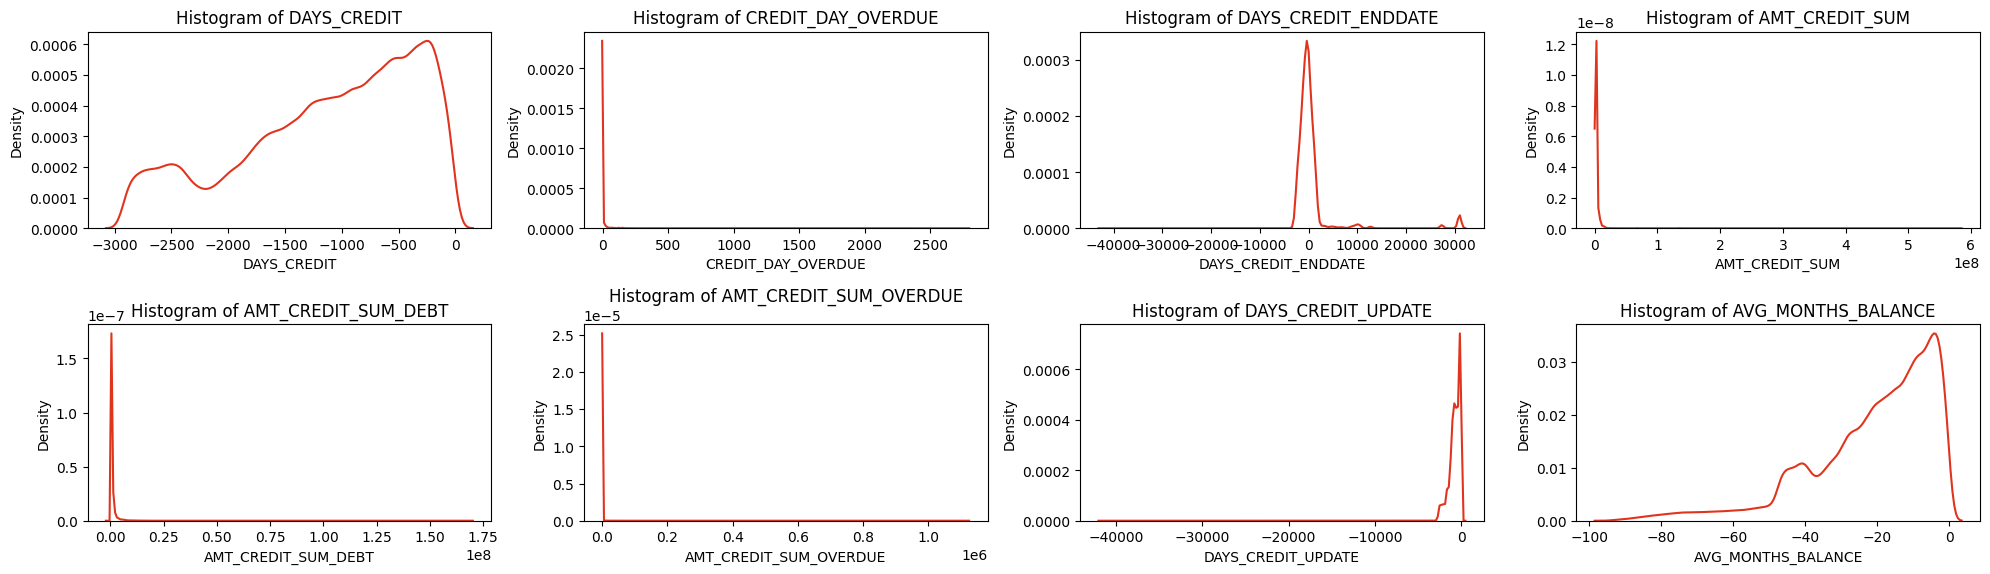

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(20, 6))
ax = ax.flatten()
for i, col in enumerate(numbur.columns):
    sns.kdeplot(numbur[col], ax=ax[i], color='#E1341E')
    ax[i].set_title(f'Histogram of {col}')

plt.tight_layout()

- for `DAYS_CREDIT_ENDDATE` missing values will be filled with 0<br>
- for `AMT_CREDIT_SUB_DEBT` missing values will be filled with median values wich is 0. This means that the client has no debt on Credit bureau credit<br>

In [20]:
bureau_clean = bureaucl.fillna(0)
bureau_clean.to_csv('.././data/bureau_clean.csv', index=False)